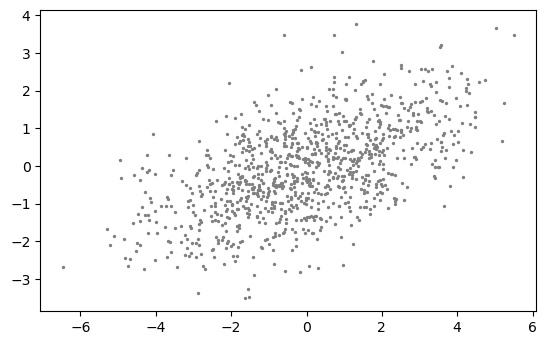

In [2]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt

N = 1000
D = 2

X = np.random.randn(N,D)
A = np.random.randn(D,D) # 2x2, 짜부
X = X.dot(A)

plt.figure()
ax = plt.subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], c = 'gray', s = 2)
ax.set_aspect('equal')

(2, 2)
[[4.28500519 1.43673209]
 [1.43673209 1.47362128]]


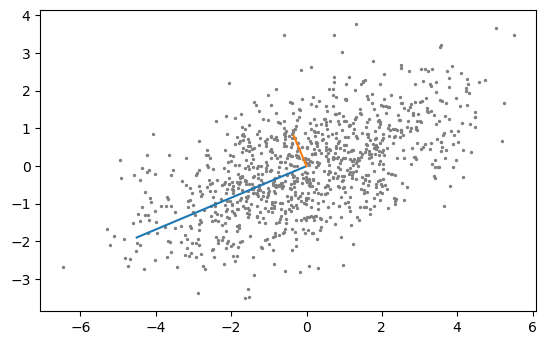

In [4]:
# X = N x D matrix
C = np.cov(X, rowvar = False) 
# cov함수는 기본적으로 샘플이 1col에1번째샘플 2col에 2번째 샘플 ,, 이렇게
# 들어었다고 가정해서 rowvar = False로 해야한다.
print(C.shape)
print(C)

U, s, V = np.linalg.svd(C)
S = np.diag(s)
# s는 벡터 / S는 diagonal matrix
# np.linag.svd를 사용하면 V가 tranpose 자동적으로 해서 출력됨
# 그냥 V를 구할려면 한번 더 transpose 시켜줘야됨
V = V.T

u1 = U[:,0]
u2 = U[:,1]

s1 = s[0]
s2 = s[1]

plt.figure()
ax = plt.subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], c = 'gray', s = 2)
ax.set_aspect('equal')

# 0 이 있어야 선이 그려짐 
plt.plot([0, s1*u1[0]], [0, s1*u1[1]])
plt.plot([0, s2*u2[0]], [0, s2*u2[1]])
# u2 보다 더 작은게 있지 않나? 2차원이니까 없네
#  

In [17]:
from sklearn import tree
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

((x_train, t_train), (x_test, t_test)) = mnist.load_data()

X_train = x_train.reshape(-1,28*28)
X_test = x_test.reshape(-1,28*28)

N_train,D = X_train.shape
N_test,D = X_test.shape

model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 1000, min_samples_leaf = 1000)
model.fit(X_train,t_train)

y_train = model.predict(X_train)
y_test = model.predict(X_test)

print( 'train %.4f, test %.4f' % (accuracy_score(y_train, t_train), accuracy_score(y_test, t_test)) )

train 0.6691, test 0.6740


dim   2: train 0.4458, test 0.4513
dim   3: train 0.4810, test 0.4914
dim   4: train 0.5522, test 0.5480
dim   5: train 0.6088, test 0.6184
dim   6: train 0.6435, test 0.6439
dim   7: train 0.6742, test 0.6712
dim   8: train 0.6961, test 0.6924
dim   9: train 0.6963, test 0.6927
dim  10: train 0.6965, test 0.6897
dim  11: train 0.6965, test 0.6897
dim  12: train 0.7013, test 0.6957
dim  13: train 0.7011, test 0.7009
dim  14: train 0.7019, test 0.7011


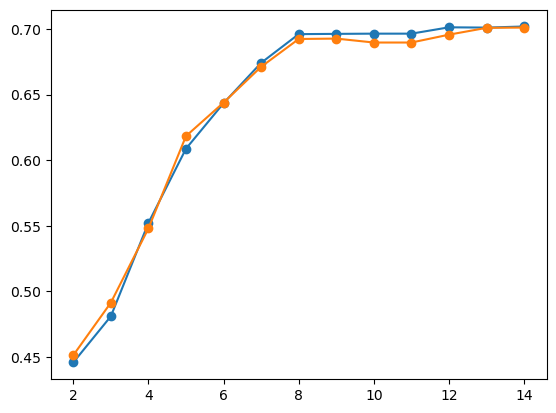

In [23]:
# 결론 : 차원을 줄였는데 accuracy는 더 올라갔다? 
# -> 중요하지 않은 차원은 noise로 작용했다.

C = np.cov(X_train, rowvar = False)
# print(C.shape)

U, s, V = np.linalg.svd(C)
S = np.diag(s)
V = V.T

dimlist = np.arange(2, 15)

accuracy_train = []
accuracy_test = []

for dim_reduction in dimlist:

    Z_train = X_train.dot(U[:,0:dim_reduction])
    Z_test = X_test.dot(U[:,0:dim_reduction])

    model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 1000, min_samples_leaf = 1000)
    model.fit(Z_train,t_train)

    y_train = model.predict(Z_train)
    y_test = model.predict(Z_test)

    print( 'dim %3d: train %.4f, test %.4f' % (dim_reduction, accuracy_score(y_train, t_train), accuracy_score(y_test, t_test)) )
    
    accuracy_train.append(accuracy_score(y_train, t_train))
    accuracy_test.append(accuracy_score(y_test, t_test))    
 
plt.figure()
plt.plot(dimlist, accuracy_train, 'o-')
plt.plot(dimlist, accuracy_test, 'o-')   

dim   2: train 0.4458, test 0.4513
dim   3: train 0.4810, test 0.4914
dim   4: train 0.5522, test 0.5480
dim   5: train 0.6089, test 0.6187
dim   6: train 0.6437, test 0.6443
dim   7: train 0.6742, test 0.6712
dim   8: train 0.6963, test 0.6922
dim   9: train 0.6962, test 0.6927
dim  10: train 0.6965, test 0.6897
dim  11: train 0.6965, test 0.6897
dim  12: train 0.7013, test 0.6956
dim  13: train 0.7013, test 0.7014
dim  14: train 0.7019, test 0.7011


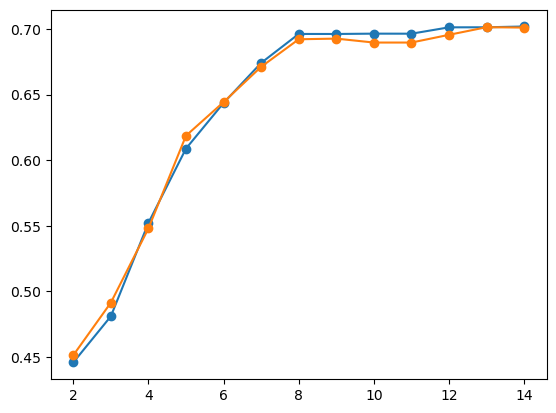

In [25]:
from sklearn.decomposition import PCA

accuracy_train = []
accuracy_test = []

dimlist = np.arange(2, 15)

for dim_reduction in dimlist:
    pca = PCA(n_components = dim_reduction)
    pca.fit(X_train)

    Z_train = pca.transform(X_train)
    Z_test = pca.transform(X_test)

    model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 1000, min_samples_leaf = 1000)
    model.fit(Z_train,t_train)

    y_train = model.predict(Z_train)
    y_test = model.predict(Z_test)

    print( 'dim %3d: train %.4f, test %.4f' % (dim_reduction, accuracy_score(y_train, t_train), accuracy_score(y_test, t_test)) )
    
    accuracy_train.append(accuracy_score(y_train, t_train))
    accuracy_test.append(accuracy_score(y_test, t_test))    
    
plt.figure()
plt.plot(dimlist, accuracy_train, 'o-')
plt.plot(dimlist, accuracy_test, 'o-')